#  Probabilistic model of signal generation based on trends

In [28]:
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
from numpy.random import default_rng

In [29]:
#parameters
n = 1000
p_stoptrend = 0.1
a_sigma = 0.8
epsilon = 0.4

In [30]:
# random generation
rng = default_rng()

# generation of trends
# one indicates a change in trend at time i
# the first element should be zero
trend_changes = np.insert(rng.binomial(1, p_stoptrend, n - 1), 0, 0)

# the number of trends needed is the number of changes plus one (for the initial trend)
num_trend_changes = sum(trend_changes)
a = a_sigma * rng.standard_normal(num_trend_changes + 1)

trend = np.empty(n)
trend_number = 0

for i in range(0, n):
    if trend_changes[i] == 1:
        trend_number += 1
    
    trend[i] = a[trend_number]

# generation of noise
noise = epsilon * rng.standard_normal(n)

In [31]:
# construction of the time series
sig = np.zeros(n)
sig[0] = rng.standard_normal(1)[0] + trend[0] + noise[0]

for i in range(1, n):
    sig[i] = sig[i - 1] + trend[i] + noise[i]

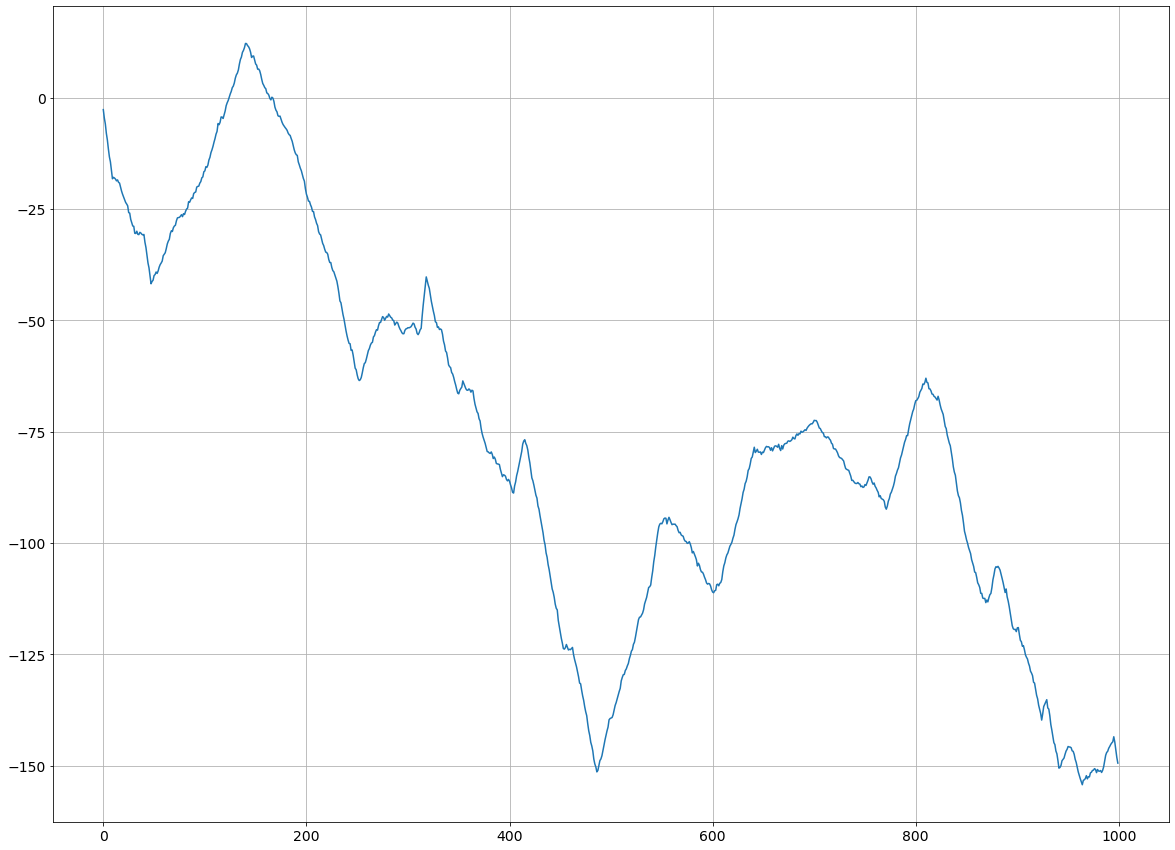

In [32]:
font = {'size': 14}
matplotlib.rc('font', **font)

plt.subplots(1, 1, figsize=(20, 15))
plt.plot(np.arange(n), sig)
#plt.plot(200 * trend_changes)
plt.grid()

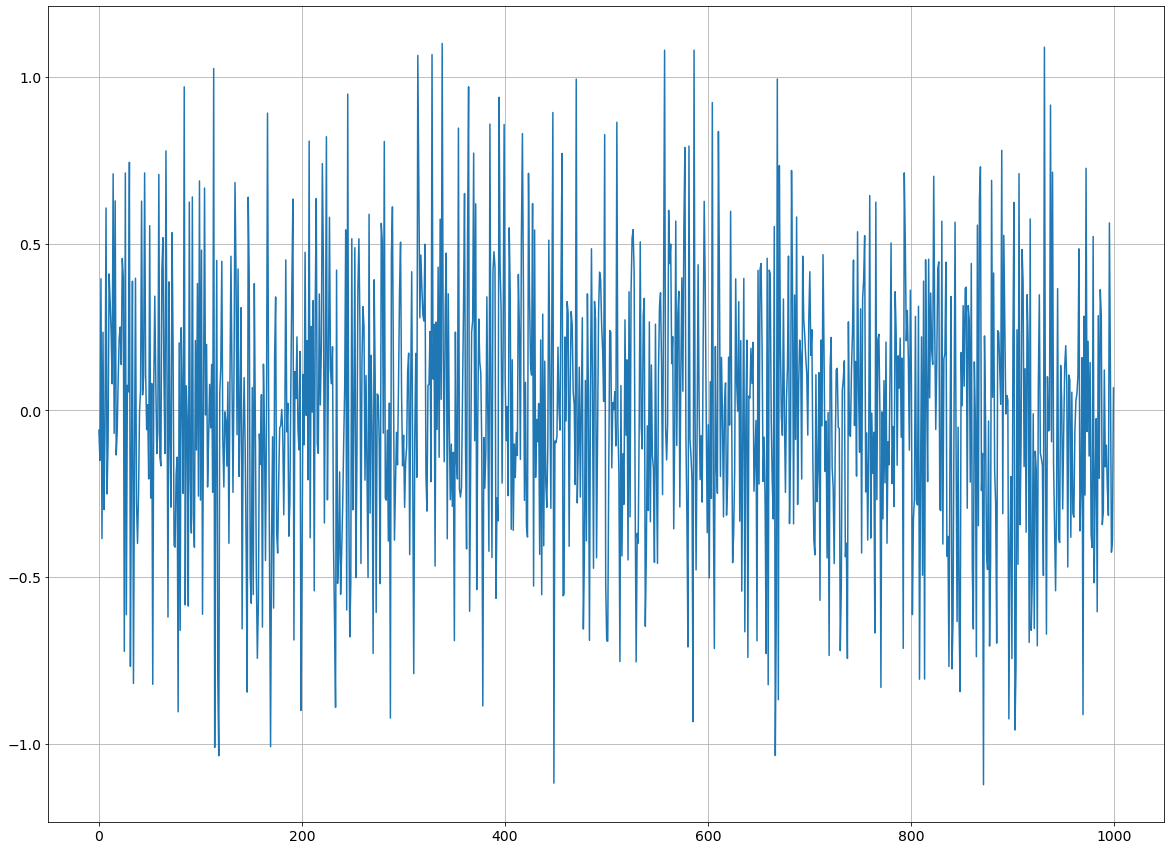

In [33]:
plt.subplots(1, 1, figsize=(20, 15))
plt.plot(np.arange(n), noise)
plt.grid()

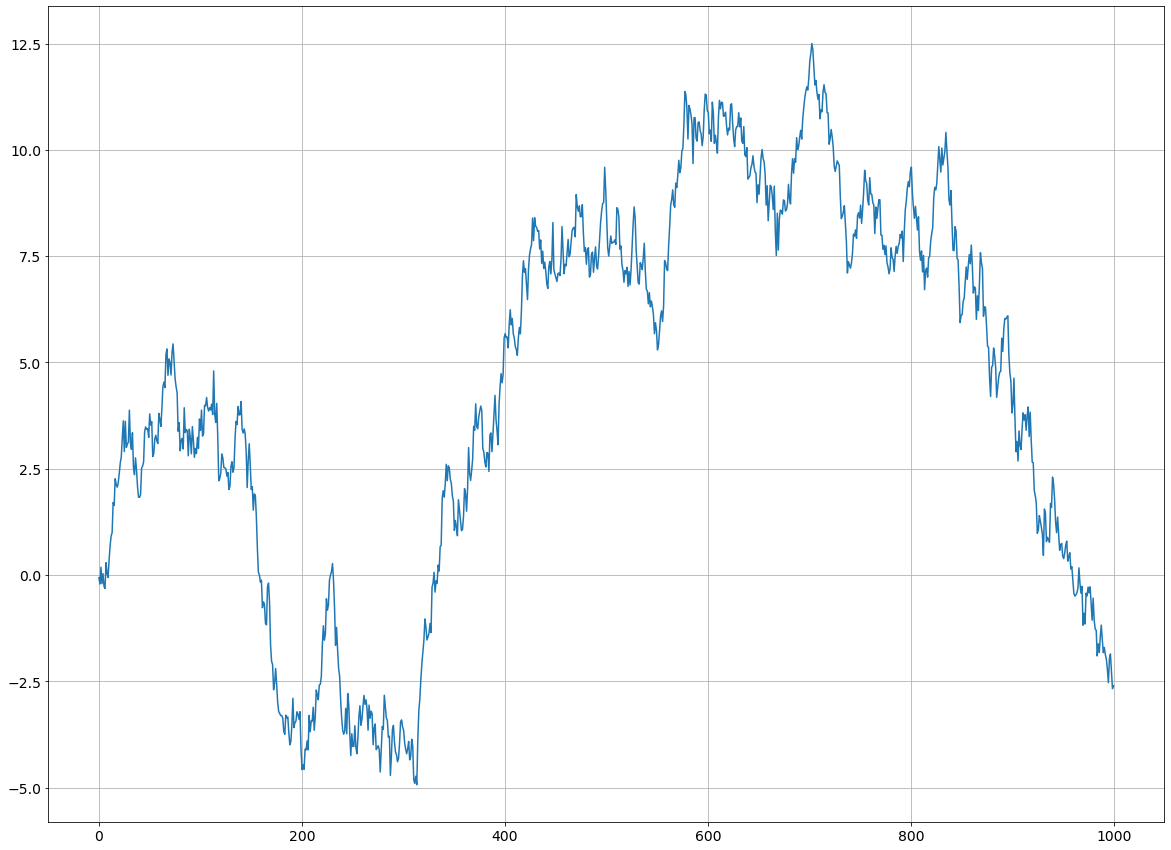

In [34]:
plt.subplots(1, 1, figsize=(20, 15))
plt.plot(np.arange(n), np.cumsum(noise))
plt.grid()